# MTH9875 Homework 7

Assigned: October 15, 2015.
Due: October 29, 2015 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang and Jim Gatheral by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

###0. (0 points) 

Read the Schoutens et al. paper.

### Load some R-code and data

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/10/9875-HW7.zip", destfile="9875-HW7.zip")
unzip(zipfile="9875-HW7.zip")

In [2]:
source("BlackScholes.R")
source("Heston2.R")
source("plotIvols.R")
source("bsvolPhi.R")

For problem 1. you will need SPX implied vols as of the close on September 15, 2005.

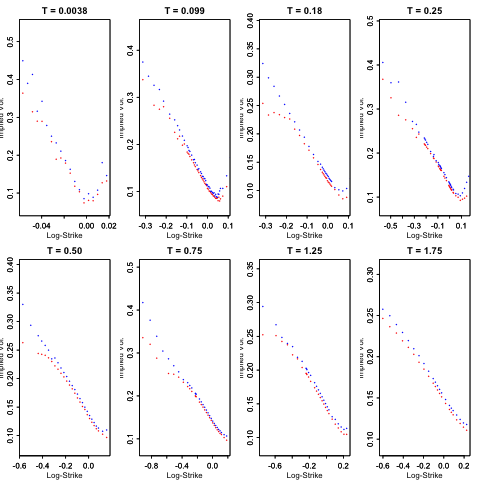

In [3]:
load("spx050915.rData") 

# Plot the resulting implied volatilities
res <- plotIvols(spxOptData) 

As usual, assume zero interest rates and dividends for the following
assignments.

##Comparison of Heston and SVJ fits to the SPX volatility surface

###1. (12 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
%\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
$$

Consider the following fits of the Heston and SVJ models to the SPX volatility surface as of 15-Sep-2005:

  |Heston|SVJ|
-----|-----:|-------:|
$v$ |0.0174 | 0.0158
$\bar v$ | 0.0354|  0.0439
$\eta$ |  0.3877|0.3038
$\rho$  | -0.7165 |-0.6974 
$\lambda$ |1.3253|0.5394 
$\lambda_J$| |0.1308
$\delta$ | |0.0967 
$\alpha$ ||-0.1151 

(a)

Using the function *bsvolPhi*, *phiHeston*, and the SVJ characteristic function code *phiSVJ* from Lecture 7, superimpose Heston and SVJ smiles with log-strikes from -1 to +1 with the above parameters. 

(b)

Amend the function *plotIvols()* to superimpose Heston and SVJ smiles on the implied volatility smiles computed from the raw option data. 

(c)

Comment briefly on the fits in a style suitable for your non-mathematical manager.

##Stochastic time change

###2. (8 points) 

Consider the following model of the stock price:

$$
S_t = S_0\,\exp\left\{\sigma\,W(\tau_t)-\frac12\,\sigma^2\,\tau_t\right\}
$$

where $W(\tau_t)$ is time-changed Brownian motion.  The time-change $\tau$ is given by

$$
\tau_t = 
\left\{
\begin{array}{ll}
 \theta_1\,t& \text{ with probability } 1/2  \\
\theta_2\,t & \text{ with probability } 1/2.
\end{array}
\right.
$$

Note that the time-change is independent of the Brownian motion $W$.

(a)

Compute the characteristic function 

$$
\phi_{\tau_t}(u) = \ee{e^{i\,u\,\tau_t}}
$$

of the time-change.

(b)

Use equation (5) of Lecture 7 to compute the characteristic function 

$$
\phi_T(u) = \ee{e^{i\,u\,x_T}}= \frac 12 \,\left\{e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_1\,T}+ e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_2\,T} \right\}.
$$

with $x_t = \log S_t/S_0$.

(c)

Without explicit computation, deduce the fair value $C(S,K,T)$ of a European-style call option with strike $K$ and time to expiry $T$ in this model.

Hint: Note that the characteristic function is the sum of two simple ones.

(d) Rederive your result in part (c) by conditioning on total variance, Hull-White style.